In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [110]:
descript_tfidf = pd.read_csv("processed_text/descriptions_tfidf.csv")
books_withRatings = pd.read_csv("cleaned_data/books_withRatings.csv")

In [111]:
normalize = StandardScaler()
descript_normalized = normalize.fit_transform(descript_tfidf)
descript_normalized = pd.DataFrame(descript_normalized, columns= descript_tfidf.columns)
descript_normalized.head(10)

,account,across,adventure,age,america,american,another,around,author,back,...,work,world,would,writer,written,year,yet,york,york time,young
0,-0.191907,-0.214711,-0.243347,-0.216521,-0.222790,-0.267776,-0.211085,-0.232449,-0.436298,-0.272141,...,-0.323857,-0.483677,-0.214849,-0.250003,-0.270893,-0.430222,-0.238427,-0.380239,-0.33719,-0.371802
1,-0.191907,-0.214711,-0.243347,3.127093,2.794361,-0.267776,-0.211085,-0.232449,1.231580,2.911244,...,3.777373,-0.483677,-0.214849,5.310950,-0.270893,-0.430222,-0.238427,3.156848,-0.33719,-0.371802
2,-0.191907,3.609995,-0.243347,-0.216521,-0.222790,-0.267776,-0.211085,-0.232449,-0.436298,-0.272141,...,1.726758,-0.483677,-0.214849,-0.250003,-0.270893,1.369919,-0.238427,-0.380239,-0.33719,-0.371802
3,-0.191907,-0.214711,-0.243347,-0.216521,-0.222790,-0.267776,3.834406,-0.232449,-0.436298,-0.272141,...,1.726758,3.647142,-0.214849,-0.250003,-0.270893,-0.430222,3.683284,1.388305,-0.33719,-0.371802
4,-0.191907,-0.214711,3.001029,-0.216521,-0.222790,-0.267776,-0.211085,-0.232449,-0.436298,-0.272141,...,-0.323857,-0.483677,-0.214849,-0.250003,-0.270893,-0.430222,-0.238427,-0.380239,-0.33719,4.149857
5,-0.191907,-0.214711,-0.243347,-0.216521,-0.222790,-0.267776,-0.211085,-0.232449,-0.436298,-0.272141,...,-0.323857,-0.483677,-0.214849,-0.250003,-0.270893,-0.430222,-0.238427,-0.380239,-0.33719,-0.371802
6,3.788071,-0.214711,-0.243347,-0.216521,-0.222790,-0.267776,-0.211085,-0.232449,-0.436298,-0.272141,...,-0.323857,-0.483677,-0.214849,-0.250003,-0.270893,1.369919,-0.238427,-0.380239,-0.33719,-0.371802
7,-0.191907,-0.214711,6.245405,-0.216521,-0.222790,-0.267776,-0.211085,-0.232449,-0.436298,2.911244,...,-0.323857,0.893263,-0.214849,-0.250003,-0.270893,-0.430222,-0.238427,-0.380239,-0.33719,-0.371802
8,-0.191907,-0.214711,-0.243347,-0.216521,-0.222790,-0.267776,-0.211085,-0.232449,-0.436298,-0.272141,...,-0.323857,-0.483677,-0.214849,-0.250003,-0.270893,-0.430222,-0.238427,-0.380239,-0.33719,1.889027
9,-0.191907,-0.214711,-0.243347,-0.216521,-0.222790,-0.267776,-0.211085,-0.232449,1.231580,-0.272141,...,-0.323857,-0.483677,-0.214849,-0.250003,-0.270893,-0.430222,-0.238427,-0.380239,-0.33719,-0.371802


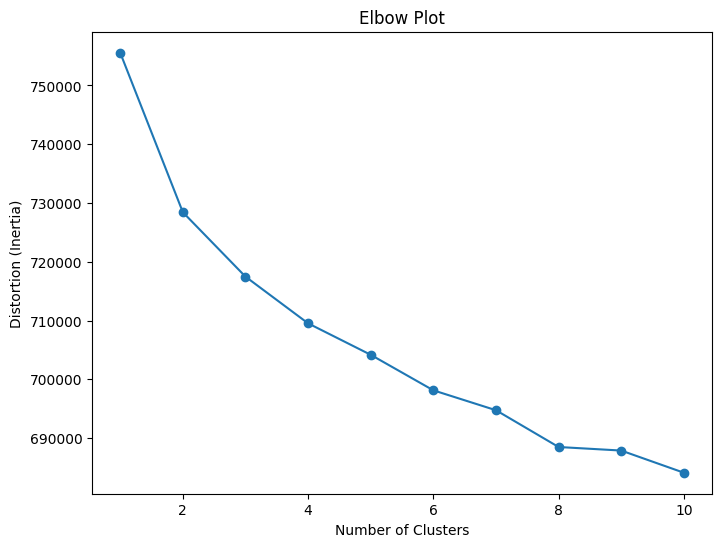

In [112]:
distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(descript_normalized)
    distortions.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.show()

In [113]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=42)
kmeans.fit(descript_normalized)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [114]:
books_withRatings["kmeans"] = kmeans.labels_

In [115]:
books_withRatings

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,review/score,kmeans
0,The Rabbi's Cat,Gaining the ability to speak after swallowing ...,['Joann Sfar'],Pantheon,2005,['Comics & Graphic Novels'],25.0,3.111111,3
1,From Potter's Field,"The sixth book in the Kay Scarpetta series, fr...",['Patricia Cornwell'],Hachette UK,2008-09-04,['Fiction'],19.0,3.200000,1
2,Economics in one lesson,"With over a million copies sold, Economics in ...",['Henry Hazlitt'],Currency,2010-08-11,['Business & Economics'],18.0,3.084337,3
3,Plain And Simple - A Woman's Journey To The Amish,"""I had an obsession with the Amish. Plan and s...",['Sue Bender'],Harper Collins,2009-03-17,['Religion'],11.0,2.857143,0
4,The Castle in the Attic,The classic children's story about a young boy...,['Elizabeth Winthrop'],Holiday House,2012-05-15,['Juvenile Fiction'],21.0,2.833333,0
...,...,...,...,...,...,...,...,...,...
4288,Rain,"Soft Rain, a nine-year-old Cherokee girl, is f...",['Cornelia Cornelissen'],Laurel Leaf,1999-11,['Juvenile Fiction'],18.0,5.000000,3
4289,God Save the Queen!,The first in an alternate fantasy series where...,['Kate Locke'],Orbit,2012-07-03,['Fiction'],34.0,2.500000,0
4290,Shadow Rider,"The #1 New York Times bestselling ""queen of pa...",['Christine Feehan'],Penguin,2016,['Fiction'],321.0,5.000000,2
4291,Ordeal By Innocence,"According to the courts, Jacko Argyle bludgeon...",['Agatha Christie'],Harper Collins,2011-02-01,['Fiction'],17.0,5.000000,3


In [116]:
books_withRatings[books_withRatings["kmeans"] == 0]

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,review/score,kmeans
3,Plain And Simple - A Woman's Journey To The Amish,"""I had an obsession with the Amish. Plan and s...",['Sue Bender'],Harper Collins,2009-03-17,['Religion'],11.0,2.857143,0
4,The Castle in the Attic,The classic children's story about a young boy...,['Elizabeth Winthrop'],Holiday House,2012-05-15,['Juvenile Fiction'],21.0,2.833333,0
6,Mothman Prophecies,This true account of the aliens who invaded th...,['John A. Keel'],Hachette UK,2013-03-28,"['Body, Mind & Spirit']",13.0,2.533333,0
7,The Gods of Mars,The Barsoom series continues: John Carter retu...,['Edgar Rice Burroughs'],Open Road Media,2020-03-17,['Fiction'],26.0,4.500000,0
8,The Forsythe Saga,The Forsyte Saga was the title originally dest...,['John Galsworthy'],FilRougeViceversa,2021-08-27,['Fiction'],20.0,4.083333,0
...,...,...,...,...,...,...,...,...,...
4266,The Beach Club: A Novel,"In The Beach Club, the juicy first novel by ta...",['Elin Hilderbrand'],St. Martin's Press,2010-04-01,['Fiction'],14.0,2.250000,0
4269,After the Quake: Stories,Set at the time of the catastrophic 1995 Kobe ...,['Haruki Murakami'],Vintage,2007-12-18,['Fiction'],55.0,2.714286,0
4275,Weedflower,Twelve-year-old Sumiko feels her life has been...,['Cynthia Kadohata'],Simon and Schuster,2008-06-30,['Juvenile Fiction'],24.0,4.000000,0
4280,Amateur Marriage,"From the inimitable Anne Tyler, a rich and com...",['Anne Tyler'],Penguin,2015-05-05,['Fiction'],43.0,2.888889,0


In [117]:
from gensim import matutils
from gensim.models import TfidfModel, LdaModel
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora import Dictionary
from gensim import corpora

In [118]:
num_topics = 20  # You can choose the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(descript_tfidf.values)

LatentDirichletAllocation(n_components=20, random_state=42)

In [119]:
topics = lda.components_

# Get document-topic assignments
doc_topic_matrix = lda.transform(descript_tfidf.values)

In [120]:
feature_names = descript_tfidf.columns

for topic_idx, topic in enumerate(topics):
    top_terms = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_terms)}")

Topic #1: murder, mystery, death, house, series, face, mysterious, find, found, must
Topic #2: war, account, world, including, experience, struggle, family, story, generation, history
Topic #3: child, country, good, many, need, want, people, question, year, story
Topic #4: power, king, give, time, show, without, go, one, series, great
Topic #5: nt, school, town, small, know, friend, go, high, one, boy
Topic #6: age, human, original, land, last, world, turn, work, adventure, master
Topic #7: edition, published, adventure, first, classic, includes, new, modern, since, many
Topic #8: century, still, great, old, end, crime, time, life, back, work
Topic #9: secret, like, journey, right, future, discover, beautiful, never, human, force
Topic #10: bestselling, bestselling author, time bestselling, new, york time, author, time, york, new york, series
Topic #11: york, new york, new, time, the, york time, review, bestseller, novel, one
Topic #12: mother, little, boy, brother, becomes, true, girl

In [121]:
dominant_topic_per_document = doc_topic_matrix.argmax(axis=1)

# Assign the dominant topics to a new column in your DataFrame
books_withRatings['dominant_topic'] = dominant_topic_per_document

In [127]:
books_withRatings[books_withRatings["dominant_topic"].isin([10, 11])]


,Title,description,authors,publisher,publishedDate,categories,ratingsCount,review/score,kmeans,dominant_topic
1,From Potter's Field,"The sixth book in the Kay Scarpetta series, fr...",['Patricia Cornwell'],Hachette UK,2008-09-04,['Fiction'],19.0,3.200000,1,10
16,The Temple of the Golden Pavilion,Because of the boyhood trauma of seeing his mo...,['Yukio Mishima'],Random House,2010-02-23,['Fiction'],12.0,4.125000,3,11
25,Mr. Timothy : A Novel (P.S.),Vidocq! Master of disguise and chief of a newl...,['Louis Bayard'],Harper Collins,2009-10-06,['Fiction'],29.0,2.857143,0,11
41,Jim the Boy,"Both delightful and wise, Jim the Boy brillian...",['Tony Earley'],Back Bay Books,2001-04-01,['Fiction'],19.0,2.640000,3,11
68,The Bonfire of the Vanities,An exhilarating satire of Eighties excess that...,['Tom Wolfe'],Random House,2018-06-21,['Fiction'],54.0,2.440000,1,10
...,...,...,...,...,...,...,...,...,...,...
4241,Pilgrim at Tinker Creek (Perennial Classics),Winner of the Pulitzer Prize “The book is a fo...,['Annie Dillard'],Harper Collins,2009-10-13,['Nature'],58.0,2.302326,3,10
4258,The Portable Dorothy Parker,"Collects short fiction, poems, reviews, and le...",['Dorothy Parker'],Penguin Classics,2006-03-28,['Fiction'],18.0,5.000000,3,10
4264,The Dante Club,NEW YORK TIMES BESTSELLER • Before The Dante C...,['Matthew Pearl'],Random House Trade Paperbacks,2004-02-10,['Fiction'],89.0,2.636364,1,10
4267,The Lord God Made Them All,Adventures in the English countryside and beyo...,['James Herriot'],Open Road Media,2011-11-15,['Biography & Autobiography'],14.0,4.000000,1,10
